In [2]:
import torch
import numpy as np
from torch.utils.data import DataLoader

from attrbench.evaluation.independent import impact_score
from attrbench.lib import PixelMaskingPolicy
from experiments.lib.util import get_ds_model, get_n_pixels, get_methods
from experiments.test.util import imshow, attrshow, show_img_attrs

# Initialization and parameters

In [12]:
BATCH_SIZE = 4
DATASET = "ImageNette"
MODEL = "resnet18"
METHOD = "GradCAM"
MODE = "insertion"

device = "cuda" if torch.cuda.is_available() else "cpu"
dataset, model = get_ds_model(DATASET, MODEL)
methods = get_methods(model, aggregation_fn="avg", normalize=False, methods=[METHOD],
                      batch_size=BATCH_SIZE, sample_shape=dataset.sample_shape[-2:])
pmp = PixelMaskingPolicy(0.)
method = methods[METHOD]
model.to(device)
for param in model.parameters():
    param.requires_grad = False
model.eval()
mask_range = [int(0.02 * get_n_pixels(DATASET) * i) for i in range(25)]

# Run Insertion/Deletion Curves

In [13]:
batch, labels = next(iter(DataLoader(dataset, BATCH_SIZE, num_workers=4, shuffle=True)))
batch = batch.to(device)
labels = labels.to(device)
result, batch_size, debug_data = impact_score(batch, labels, model, mask_range[1:], method, pmp, strict=False, tau=0.5, debug_mode=True)

/home/arne/Documents/PhD/projects/benchmark/venv/lib/python3.8/site-packages/captum/attr/_utils/gradient.py:31: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
/home/arne/Documents/PhD/projects/benchmark/venv/lib/python3.8/site-packages/torch/nn/functional.py:2970: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "


# Plot results

## Plot the original samples and their attributions

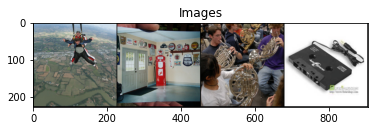

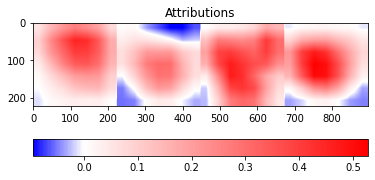

In [14]:
show_img_attrs(dataset.denormalize(batch), debug_data["attrs"])

## Plot perturbed samples and values for each perturbation step

n: 0


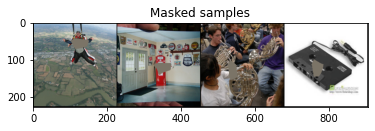

n: 1003


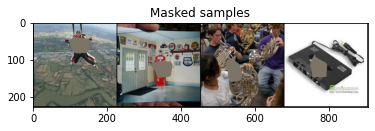

n: 2007


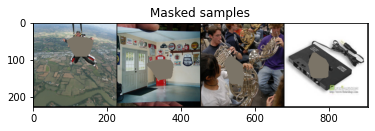

n: 3010


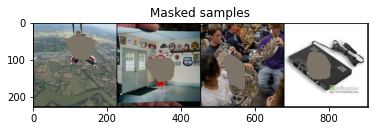

n: 4014


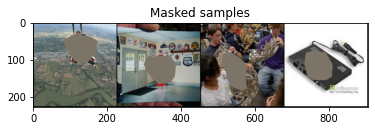

n: 5017


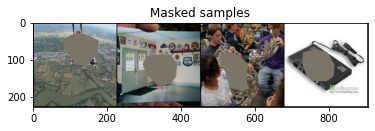

n: 6021


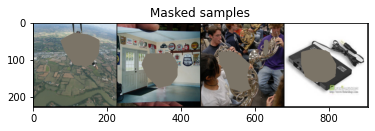

n: 7024


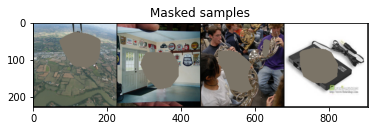

n: 8028


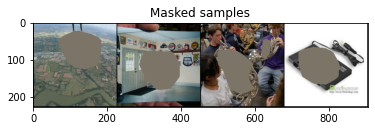

n: 9031


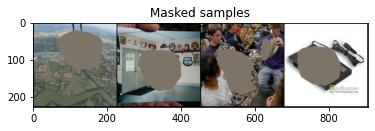

n: 10035


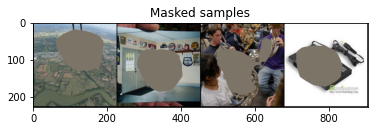

n: 11038


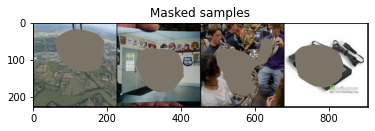

n: 12042


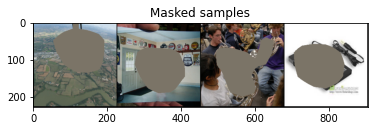

n: 13045


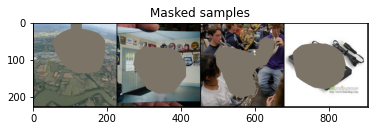

n: 14049


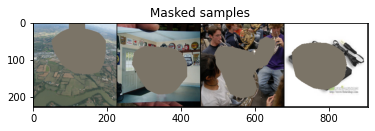

n: 15052


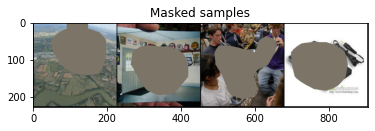

n: 16056


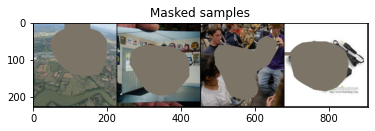

n: 17059


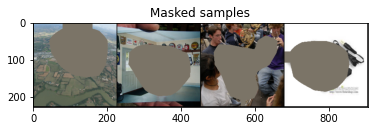

n: 18063


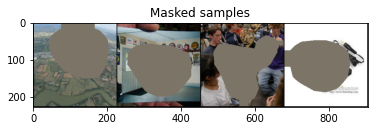

n: 19066


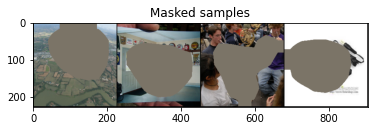

n: 20070


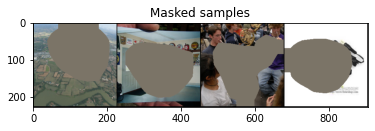

n: 21073


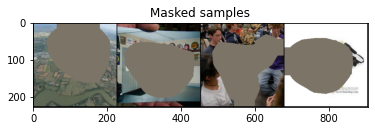

n: 22077


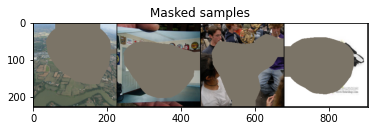

n: 23080


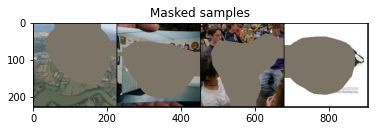

In [15]:
for n_idx, masked_samples in enumerate(debug_data["masked_samples"]):
    print(f"n: {mask_range[n_idx]}")
    imshow(dataset.denormalize(masked_samples), title="Masked samples")